In [3]:
##TASK1

import pandas as pd
file_path ="StarClassificationDataset.csv"
df = pd.read_csv(file_path)
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   object_ID       100000 non-null  float64
 1   alpha           99999 non-null   object 
 2   delta           99998 non-null   float64
 3   UV_filter       100000 non-null  float64
 4   green_filter    100000 non-null  float64
 5   red_filter      100000 non-null  float64
 6   near_IR_filter  100000 non-null  float64
 7   IR_filter       100000 non-null  float64
 8   run_ID          99994 non-null   object 
 9   rerun_ID        100000 non-null  int64  
 10  cam_col         100000 non-null  int64  
 11  field_ID        100000 non-null  int64  
 12  spec_obj_ID     100000 non-null  float64
 13  red_shift       100000 non-null  float64
 14  plate_ID        100000 non-null  int64  
 15  MJD             100000 non-null  int64  
 16  fiber_ID        100000 non-null  int64  
 17  class      

/var/folders/r8/hsg7qj6j02x97jd7mlfqxqlw0000gn/T/ipykernel_34818/206281017.py:3: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


(None,
       object_ID        alpha      delta  UV_filter  green_filter  red_filter  \
 0  1.240000e+18  135.6891066  32.494632   23.87882      22.27530    20.39501   
 1  1.240000e+18  144.8261006  31.274185   24.77759      22.83188    22.58444   
 2  1.240000e+18  142.1887896  35.582444   25.26307      22.66389    20.60976   
 3  1.240000e+18  338.7410378  -0.402828   22.13682      23.77656    21.61162   
 4  1.240000e+18  345.2825932  21.183866   19.43718      17.58028    16.49747   
 
    near_IR_filter  IR_filter run_ID  rerun_ID  cam_col  field_ID  \
 0        19.16573   18.79371   3606       301        2        79   
 1        21.16812   21.61427   4518       301        5       119   
 2        19.34857   18.94827   3606       301        2       120   
 3        20.50454   19.25010   4192       301        3       214   
 4        15.97711   15.54461    NaN       301        3       137   
 
     spec_obj_ID  red_shift  plate_ID    MJD  fiber_ID   class  
 0  6.540000e+18   0.634

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
# Drop columns that are not useful for classification (IDs, categorical features with mixed types)
df_cleaned = df.drop(columns=["object_ID", "alpha", "run_ID", "spec_obj_ID"])

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Encode the target variable
label_encoder = LabelEncoder()
df_cleaned["class"] = label_encoder.fit_transform(df_cleaned["class"])  # Mapping GALAXY, STAR, QSO to numbers

# Separate features and target
X = df_cleaned.drop(columns=["class"])
y = df_cleaned["class"]

# Perform stratified split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [9]:
# Apply Standard Scaling to numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train a RandomForest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Predictions
y_pred = rf_model.predict(X_val_scaled)

In [13]:
# Classification Report
class_report = classification_report(y_val, y_pred, target_names=label_encoder.classes_)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

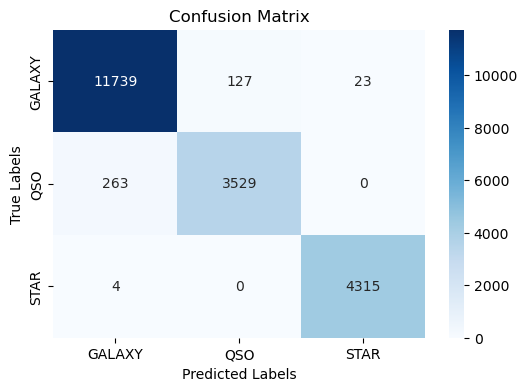

'              precision    recall  f1-score   support\n\n      GALAXY       0.98      0.99      0.98     11889\n         QSO       0.97      0.93      0.95      3792\n        STAR       0.99      1.00      1.00      4319\n\n    accuracy                           0.98     20000\n   macro avg       0.98      0.97      0.98     20000\nweighted avg       0.98      0.98      0.98     20000\n'

In [15]:
# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Display classification report
class_report

Classification Report
The overall accuracy is 98%, meaning the model is highly effective.
F1-score is 0.98 for GALAXY, 0.95 for QSO, and 1.00 for STAR.
STAR has the best performance, with near-perfect precision and recall.
QSO has the lowest recall (0.93), meaning some QSOs are misclassified.

Confusion Matrix Insights
Most predictions are correct, with very few misclassifications.
Some QSO samples are classified as GALAXY, leading to the lowest recall for QSO.
GALAXY and STAR classifications are very strong, with almost all correct predictions.

In [17]:
#TASK2
housing_file_path = "housing.csv"
housing_df = pd.read_csv(housing_file_path)
housing_df.info(), housing_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


(None,
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income  median_house_value ocean_proximity  
 0       322.0       126.0         8.3252            452600.0        NEAR BAY  
 1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
 2       496.0       177.0         7.2574            352100.0        NEAR BAY  
 3       558.0       219.0         5.6431            341300.0        NEAR BAY  
 4       565.0       259.0         3.8462            342200.0        NEAR BAY  )

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
 #Fill missing values in 'total_bedrooms' using median
housing_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].median(), inplace=True)

# Apply Sturge’s Rule to define the number of bins for stratification
num_bins = int(1 + np.log2(len(housing_df)))

# Create bins based on 'median_house_value' for stratified sampling
housing_df["price_category"] = pd.cut(housing_df["median_house_value"],
                                      bins=num_bins,
                                      labels=False)

/var/folders/r8/hsg7qj6j02x97jd7mlfqxqlw0000gn/T/ipykernel_34818/107630016.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].median(), inplace=True)
